In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn styles
%matplotlib inline
sns.set_palette('colorblind')
sns.set_style('white')
plt.rcParams['figure.figsize'] = (10.0, 6.0)

In [10]:
# Read in files 
tweets = pd.read_csv('data/training_set.csv', index_col=0)

In [11]:
tweets.head()

,id,screen_name,real_name,created_at,text,retweet_count
0,1002091924990423040,prattprattpratt,chris pratt,Thu May 31 07:38:27 +0000 2018,Thanks!! Good luck!👍🏼🍀 https://t.co/wTZPJ8NQla,160
1,1002089504184954881,prattprattpratt,chris pratt,Thu May 31 07:28:50 +0000 2018,🙏♥️ thank you Kate. https://t.co/h4EHDJLFyn,95
2,1002052396116213761,prattprattpratt,chris pratt,Thu May 31 05:01:23 +0000 2018,That’s wonderful Jessica. Thank you! https://t...,190
3,1002028897892945920,prattprattpratt,chris pratt,Thu May 31 03:28:00 +0000 2018,ONLY TWO DAYS LEFT TO ENTER! Click the link in...,268
4,1001881940901945344,prattprattpratt,chris pratt,Wed May 30 17:44:03 +0000 2018,😂 Man. That HAD to be traumatizing. https://t....,203


In [12]:
# Functions for our lambda functions later
def percentInCaps(s):
    inCaps = sum(1 for c in s if c.isupper())
    inLowerCase = sum(1 for c in s if c.islower())
    try:
        return inCaps/float(inCaps + inLowerCase) 
    except:
        return 0

def num_hashtags(s):
    return sum(1 for c in s if c == "#")

def num_mentions(s):
    return sum(1 for c in s if c == "@")

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~' # Excludes '#' and '@'
def percentPunctuation(s):
    return sum(1 for c in s if c in punctuation)/float(len(s))
    
# Create new features based on text attributes
tweets["percentPunctuation"] = tweets["text"].apply(lambda x: percentPunctuation(x)) 
tweets["percentInCaps"] = tweets["text"].apply(lambda x: percentInCaps(x))    
tweets["numHastags"] = tweets["text"].apply(lambda x: num_hashtags(x))
tweets["numMentions"] = tweets["text"].apply(lambda x: num_mentions(x))

# Get a summary of  Tweet attributes
tweets.groupby("screen_name").mean()

,id,retweet_count,percentPunctuation,percentInCaps,numHastags,numMentions
screen_name,,,,,,
JimOHeir,9.009275e+17,1196.414,0.080571,0.120787,0.219,1.574
MeganMullally,8.432649e+17,5016.771,0.082157,0.163219,0.641,1.300
Nick_Offerman,9.593164e+17,1622.781,0.074783,0.150073,0.240,1.090
VancityReynolds,7.189749e+17,8970.356,0.077532,0.117356,0.351,0.553
azizansari,5.889852e+17,548.720,0.067260,0.144071,0.191,0.629
evilhag,7.088374e+17,810.345,0.083109,0.292863,0.570,1.274
mradamscott,9.048391e+17,5179.123,0.078555,0.180872,0.355,0.915
prattprattpratt,8.728462e+17,935.289,0.104565,0.156769,0.312,0.364


In [13]:

# Extract month, day, and hour from timestamp and append back to DataFrame# Extra 

weekdayDict = {"0": "M", "1": "Tu", "2": "W", "3": "Th", "4": "F", "5": "Sa", "6": "Su"}

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets["hour"] = tweets["created_at"].apply(lambda x: x.hour)
tweets["day"] = tweets["created_at"].apply(lambda x: x.weekday())
tweets["dayofmonth"] = tweets["created_at"].apply(lambda x: x.day)
tweets["month"] = tweets["created_at"].apply(lambda x: x.month)

tweets.head()

,id,screen_name,real_name,created_at,text,retweet_count,percentPunctuation,percentInCaps,numHastags,numMentions,hour,day,dayofmonth,month
0,1002091924990423040,prattprattpratt,chris pratt,2018-05-31 07:38:27,Thanks!! Good luck!👍🏼🍀 https://t.co/wTZPJ8NQla,160,0.173913,0.258065,0,0,7,3,31,5
1,1002089504184954881,prattprattpratt,chris pratt,2018-05-31 07:28:50,🙏♥️ thank you Kate. https://t.co/h4EHDJLFyn,95,0.139535,0.241379,0,0,7,3,31,5
2,1002052396116213761,prattprattpratt,chris pratt,2018-05-31 05:01:23,That’s wonderful Jessica. Thank you! https://t...,190,0.116667,0.155556,0,0,5,3,31,5
3,1002028897892945920,prattprattpratt,chris pratt,2018-05-31 03:28:00,ONLY TWO DAYS LEFT TO ENTER! Click the link in...,268,0.084507,0.490566,0,0,3,3,31,5
4,1001881940901945344,prattprattpratt,chris pratt,2018-05-30 17:44:03,😂 Man. That HAD to be traumatizing. https://t....,203,0.118644,0.186047,0,0,17,2,30,5


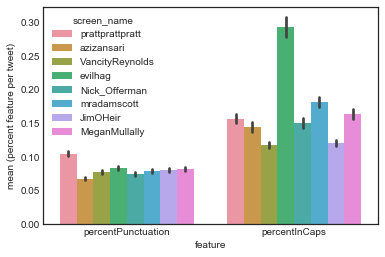

In [16]:

# Draw bar plots comparing Parks and Recs team by % in CAPS and % of punctuation# Draw b 

value_matrix = pd.DataFrame(columns=["screen_name", "feature", "value"])
for i in tweets[["screen_name", "percentPunctuation", "percentInCaps"]].iterrows():
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["screen_name"], "percentPunctuation", i[1]["percentPunctuation"]]
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["screen_name"], "percentInCaps", i[1]["percentInCaps"]]

sns.barplot(data=value_matrix, hue="screen_name", x="feature", y="value", ).set(ylabel='mean (percent feature per tweet)');


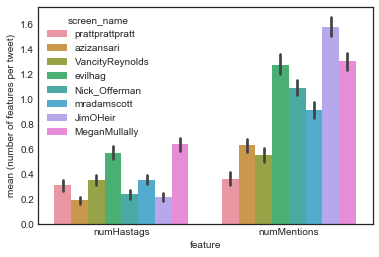

In [17]:

# Draw bar plots comparing Parks and Recs team by number of #s and @s per tweet# Draw b 

value_matrix = pd.DataFrame(columns=["screen_name", "feature", "value"])
for i in tweets[["screen_name", "numHastags", "numMentions"]].iterrows():
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["screen_name"], "numHastags", i[1]["numHastags"]]
    value_matrix.loc[value_matrix.shape[0]] = [i[1]["screen_name"], "numMentions", i[1]["numMentions"]]

sns.barplot(data=value_matrix, hue="screen_name", x="feature", y="value").set(ylabel='mean (number of features per tweet)');

In [18]:
tweets.screen_name.unique()

array(['prattprattpratt', 'azizansari', 'VancityReynolds', 'evilhag',
       'Nick_Offerman', 'mradamscott', 'JimOHeir', 'MeganMullally'],
      dtype=object)

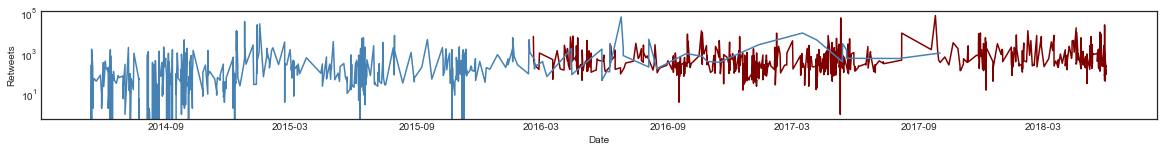

In [23]:
# Create timeseries graph for Parks and Recs teamretweets counts

tweets["created_at"] = pd.to_datetime(tweets["created_at"])
value_matrix = tweets[["created_at", "retweet_count", "screen_name"]]
value_matrix = value_matrix.sort_values('created_at').reset_index().drop('index', 1)

prattprattpratt = value_matrix[value_matrix["screen_name"] == "prattprattpratt"]
azizansari = value_matrix[value_matrix["screen_name"] == "azizansari"]

VancityReynolds = value_matrix[value_matrix["screen_name"] == "VancityReynolds"]
evilhag = value_matrix[value_matrix["screen_name"] == "evilhag"]

Nick_Offerman = value_matrix[value_matrix["screen_name"] == "Nick_Offerman"]
mradamscott = value_matrix[value_matrix["screen_name"] == "mradamscott"]

JimOHeir = value_matrix[value_matrix["screen_name"] == "JimOHeir"]
MeganMullally = value_matrix[value_matrix["screen_name"] == "MeganMullally"]

plt.rcParams['figure.figsize'] = (20.0, 2.0)
plt.yscale('log')
plt.plot(prattprattpratt["created_at"], prattprattpratt["retweet_count"], "maroon", azizansari["created_at"], azizansari["retweet_count"], "steelblue");
plt.ylabel("Retweets");
plt.xlabel("Date");

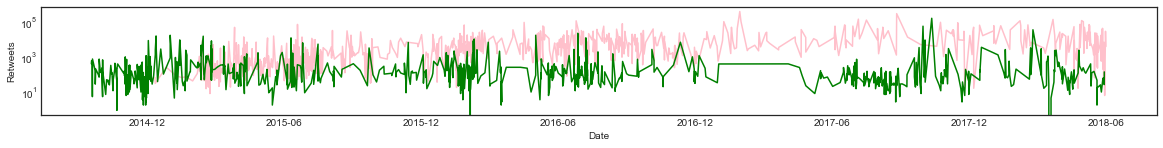

In [24]:
plt.rcParams['figure.figsize'] = (20.0, 2.0)
plt.yscale('log')
plt.plot(VancityReynolds["created_at"], VancityReynolds["retweet_count"], "pink", evilhag["created_at"], evilhag["retweet_count"], "green");
plt.ylabel("Retweets");
plt.xlabel("Date");

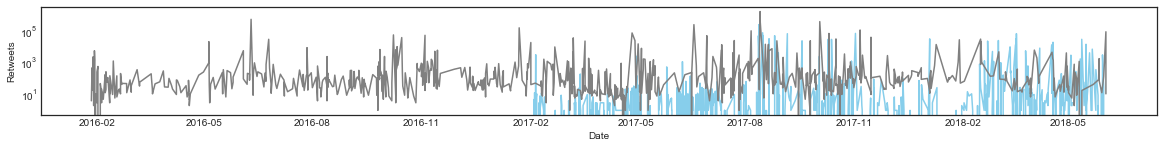

In [26]:
plt.rcParams['figure.figsize'] = (20.0, 2.0)
plt.yscale('log')
plt.plot(JimOHeir["created_at"], JimOHeir["retweet_count"], "skyblue", MeganMullally["created_at"], MeganMullally["retweet_count"], "grey");
plt.ylabel("Retweets");
plt.xlabel("Date");

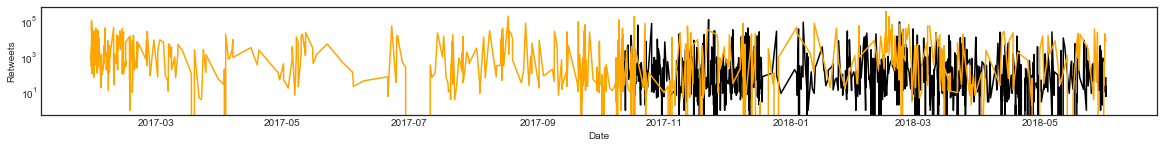

In [27]:
plt.rcParams['figure.figsize'] = (20.0, 2.0)
plt.yscale('log')
plt.plot(Nick_Offerman["created_at"], Nick_Offerman["retweet_count"], "black", mradamscott["created_at"], mradamscott["retweet_count"], "orange");
plt.ylabel("Retweets");
plt.xlabel("Date");

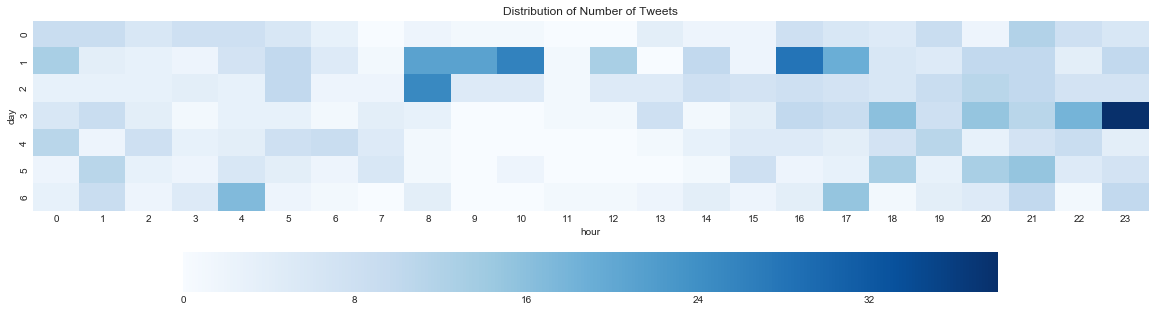

In [29]:
# Heatmap of Chris Pratt Tweets

value_matrix = tweets[tweets["screen_name"] == "prattprattpratt"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

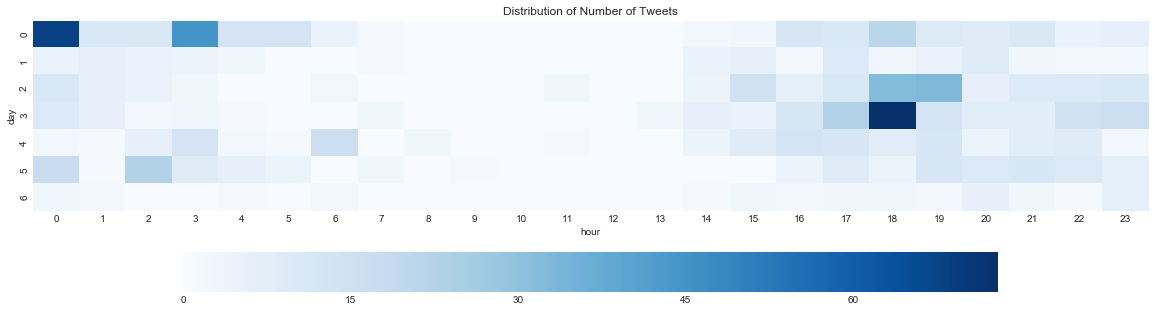

In [30]:
# Heatmap of Aziz Ansari Tweets

value_matrix = tweets[tweets["screen_name"] == "azizansari"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

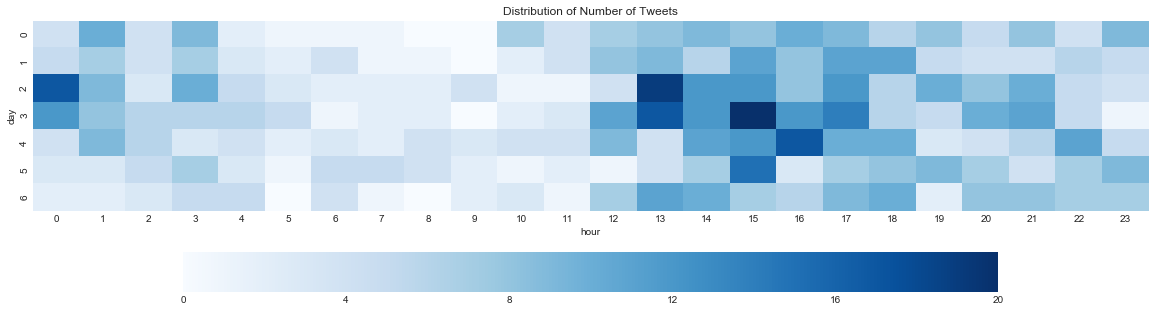

In [32]:
# Heatmap of Ryan Reynolds Tweets

value_matrix = tweets[tweets["screen_name"] == "VancityReynolds"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

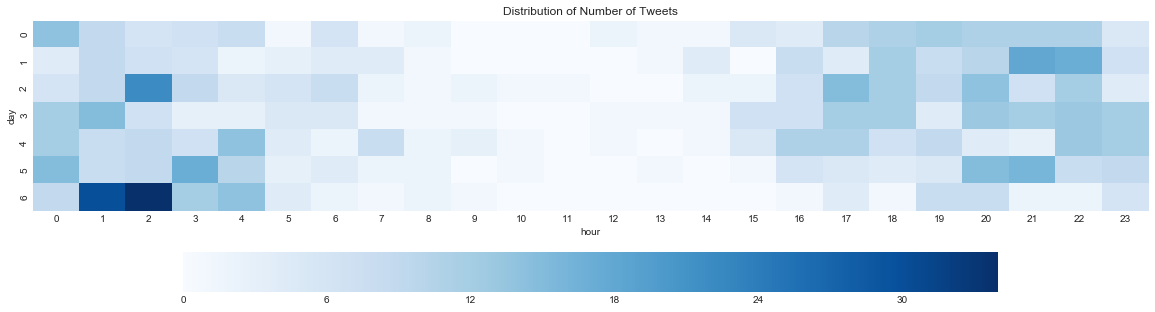

In [33]:
# Heatmap of Aubrey Plaza Tweets

value_matrix = tweets[tweets["screen_name"] == "evilhag"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

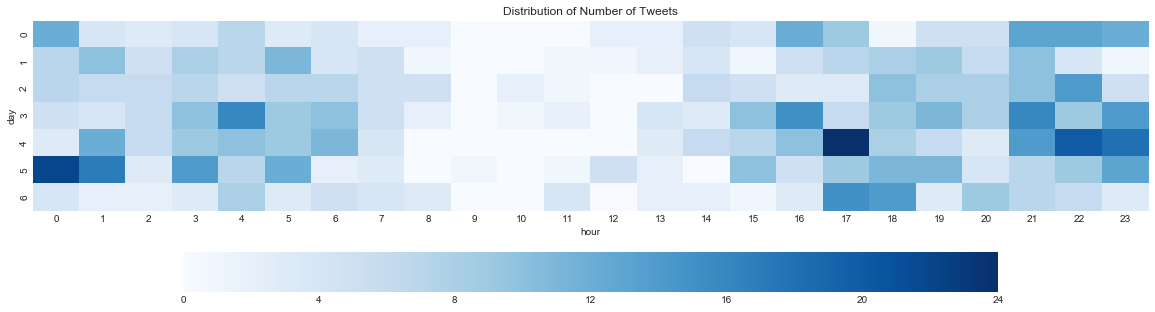

In [34]:
# Heatmap of Nick Offerman Tweets

value_matrix = tweets[tweets["screen_name"] == "Nick_Offerman"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

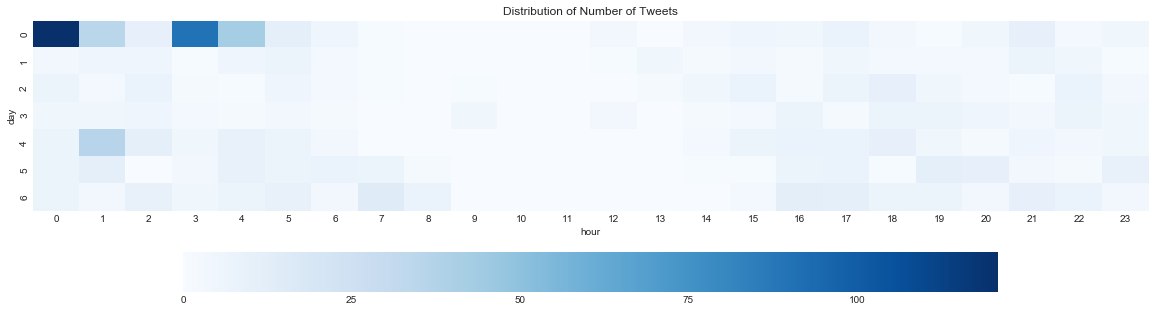

In [35]:
# Heatmap of Adam Scott Tweets

value_matrix = tweets[tweets["screen_name"] == "mradamscott"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

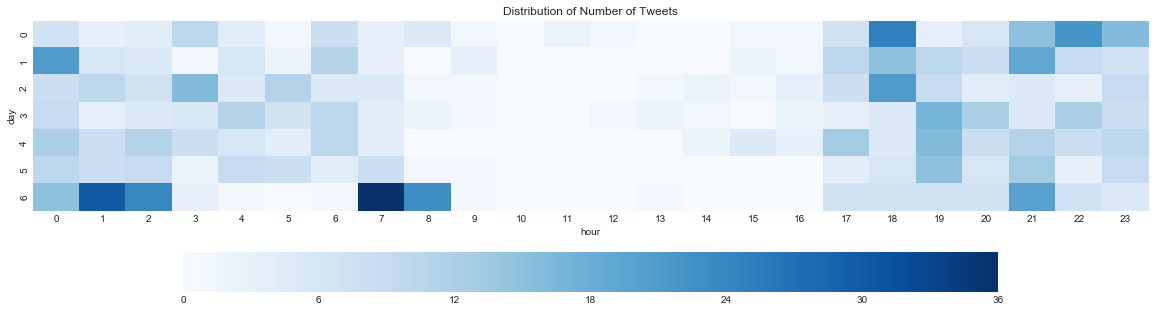

In [36]:
# Heatmap of Jim O Heir Tweets

value_matrix = tweets[tweets["screen_name"] == "JimOHeir"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");

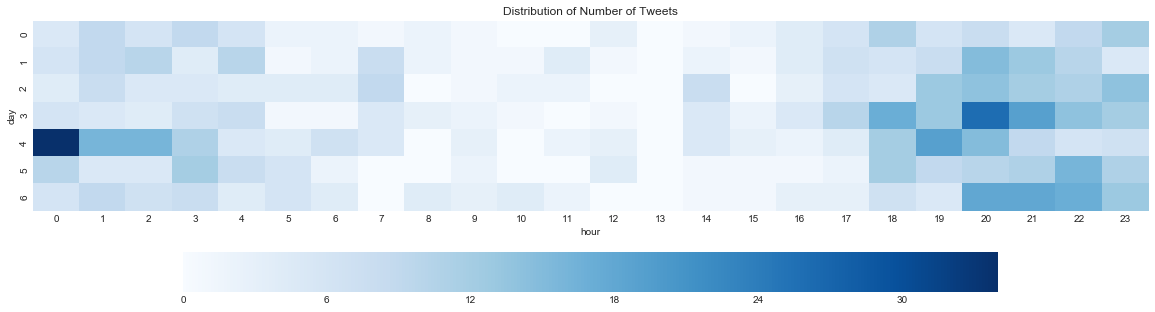

In [37]:
# Heatmap of Megan Mullally Tweets

value_matrix = tweets[tweets["screen_name"] == "MeganMullally"][["day", "hour", "id"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "id")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap='Blues');
plt.title("Distribution of Number of Tweets");